# **Cyclistic Company Analysis**
## About the company 
In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and returned to any other station in the system anytime.  
Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments. One approach that helped make these things possible was the flexibility of its pricing plans: single-ride passes, full-day passes, and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers who purchase annual memberships are Cyclistic members.  
    **Now we want to increase the annual membership of the company.**

# **Importing Data**

In [22]:
import numpy as np 
import pandas as pd
data=pd.read_csv("/kaggle/input/cyclistic-trip-data/202005-divvy-tripdata.csv")
df=pd.DataFrame(data)
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,02668AD35674B983,docked_bike,2020-05-27 10:03:52,2020-05-27 10:16:49,Franklin St & Jackson Blvd,36,Wabash Ave & Grand Ave,199.0,41.8777,-87.6353,41.8915,-87.6268,member
1,7A50CCAF1EDDB28F,docked_bike,2020-05-25 10:47:11,2020-05-25 11:05:40,Clark St & Wrightwood Ave,340,Clark St & Leland Ave,326.0,41.9295,-87.6431,41.9671,-87.6674,casual
2,2FFCDFDB91FE9A52,docked_bike,2020-05-02 14:11:03,2020-05-02 15:48:21,Kedzie Ave & Milwaukee Ave,260,Kedzie Ave & Milwaukee Ave,260.0,41.9296,-87.7079,41.9296,-87.7079,casual
3,58991CF1DB75BA84,docked_bike,2020-05-02 16:25:36,2020-05-02 16:39:28,Clarendon Ave & Leland Ave,251,Lake Shore Dr & Wellington Ave,157.0,41.9680,-87.6500,41.9367,-87.6368,casual
4,A79651EFECC268CD,docked_bike,2020-05-29 12:49:54,2020-05-29 13:27:11,Hermitage Ave & Polk St,261,Halsted St & Archer Ave,206.0,41.8715,-87.6699,41.8472,-87.6468,member


# **Data Preprocessing**

In [23]:
df.shape

(200274, 13)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200274 entries, 0 to 200273
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             200274 non-null  object 
 1   rideable_type       200274 non-null  object 
 2   started_at          200274 non-null  object 
 3   ended_at            200274 non-null  object 
 4   start_station_name  200274 non-null  object 
 5   start_station_id    200274 non-null  int64  
 6   end_station_name    199953 non-null  object 
 7   end_station_id      199953 non-null  float64
 8   start_lat           200274 non-null  float64
 9   start_lng           200274 non-null  float64
 10  end_lat             199953 non-null  float64
 11  end_lng             199953 non-null  float64
 12  member_casual       200274 non-null  object 
dtypes: float64(5), int64(1), object(7)
memory usage: 19.9+ MB


In [25]:
df.describe()

,start_station_id,end_station_id,start_lat,start_lng,end_lat,end_lng
count,200274.000000,199953.000000,200274.000000,200274.000000,199953.000000,199953.000000
mean,235.461248,237.757628,41.907742,-87.648425,41.908033,-87.648885
std,160.284444,162.411256,0.043489,0.025572,0.043637,0.025669
min,2.000000,2.000000,41.736600,-87.774700,41.736600,-87.774700
25%,112.000000,113.000000,41.884100,-87.663900,41.884100,-87.664000
50%,211.000000,212.000000,41.903100,-87.644600,41.903200,-87.646300
75%,322.000000,324.000000,41.932400,-87.630900,41.932600,-87.631200
max,673.000000,673.000000,42.064900,-87.549400,42.064900,-87.549400


# **Clean up and Add data to Prepare Fot Analysis**

In [26]:
df["member_casual"].value_counts()


member    113365
casual     86909
Name: member_casual, dtype: int64

In [27]:
df["member_casual"] = df["member_casual"].replace({"Subscriber": "member", "Customer": "casual"})

In [28]:
# Add columns for date, month, day, year, and day of the week
df["date"] = pd.to_datetime(df["started_at"]).dt.date
df["month"] = pd.to_datetime(df["started_at"]).dt.month
df["day"] = pd.to_datetime(df["started_at"]).dt.day
df["year"] = pd.to_datetime(df["started_at"]).dt.year
df["day_of_week"] = pd.to_datetime(df["started_at"]).dt.day_name()


In [29]:
# Add a calculated field for ride_length (in seconds)
df["ride_length"] = pd.to_datetime(df["ended_at"]) - pd.to_datetime(df["started_at"])
df["ride_length"] = df["ride_length"].dt.total_seconds()
# Convert "ride_length" from timedelta to numeric (seconds)
df["ride_length"] = df["ride_length"].astype(float)

# Remove "bad" data
df_v2 = df[(df["start_station_name"] != "HQ QR") & (df["ride_length"] >= 0)].copy()


In [30]:
df_v2.describe()

,start_station_id,end_station_id,start_lat,start_lng,end_lat,end_lng,month,day,year,ride_length
count,200102.000000,199782.000000,200102.000000,200102.000000,199782.000000,199782.000000,200102.0,200102.000000,200102.0,2.001020e+05
mean,235.464478,237.764914,41.907742,-87.648424,41.908036,-87.648885,5.0,17.986672,2020.0,2.005171e+03
std,160.282837,162.417222,0.043493,0.025573,0.043642,0.025671,0.0,9.358277,0.0,9.361065e+03
min,2.000000,2.000000,41.736600,-87.774700,41.736600,-87.774700,5.0,1.000000,2020.0,0.000000e+00
25%,112.000000,113.000000,41.884100,-87.663900,41.884100,-87.664000,5.0,9.000000,2020.0,6.310000e+02
50%,211.000000,212.000000,41.903100,-87.644600,41.903200,-87.646300,5.0,21.000000,2020.0,1.169000e+03
75%,322.000000,324.000000,41.932400,-87.630900,41.932600,-87.631200,5.0,26.000000,2020.0,1.955000e+03
max,673.000000,673.000000,42.064900,-87.549400,42.064900,-87.549400,5.0,31.000000,2020.0,1.733813e+06


# **Data Visualization using Matplotlib**

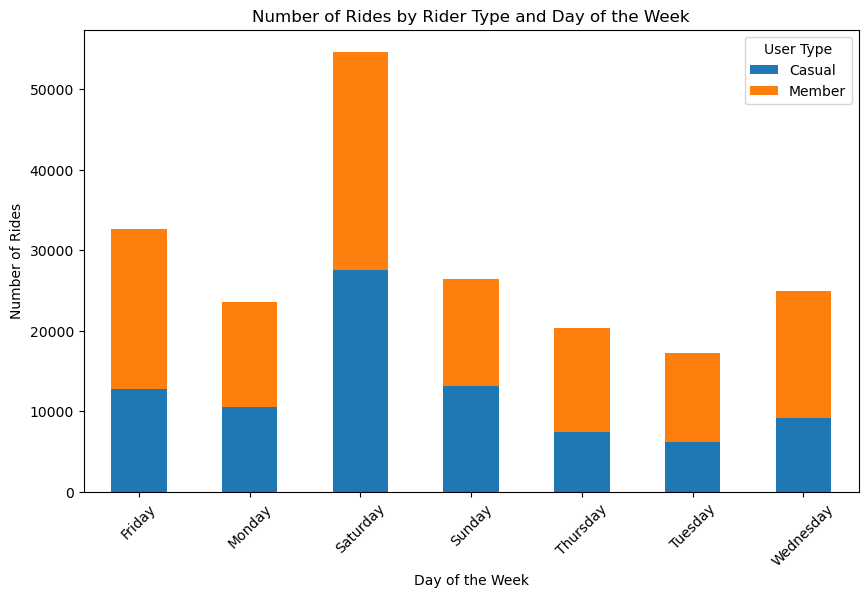

In [31]:
# Number of rides by rider type
rides_by_user = df_v2.groupby(["member_casual", "day_of_week"])["ride_id"].count().reset_index()

# Pivot the data for visualization
pivot_rides_by_user = rides_by_user.pivot(index="day_of_week", columns="member_casual", values="ride_id")

# Plot the number of rides by rider type
pivot_rides_by_user.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Number of Rides by Rider Type and Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Rides")
plt.xticks(rotation=45)
plt.legend(title="User Type", loc="upper right", labels=["Casual", "Member"])
plt.show()


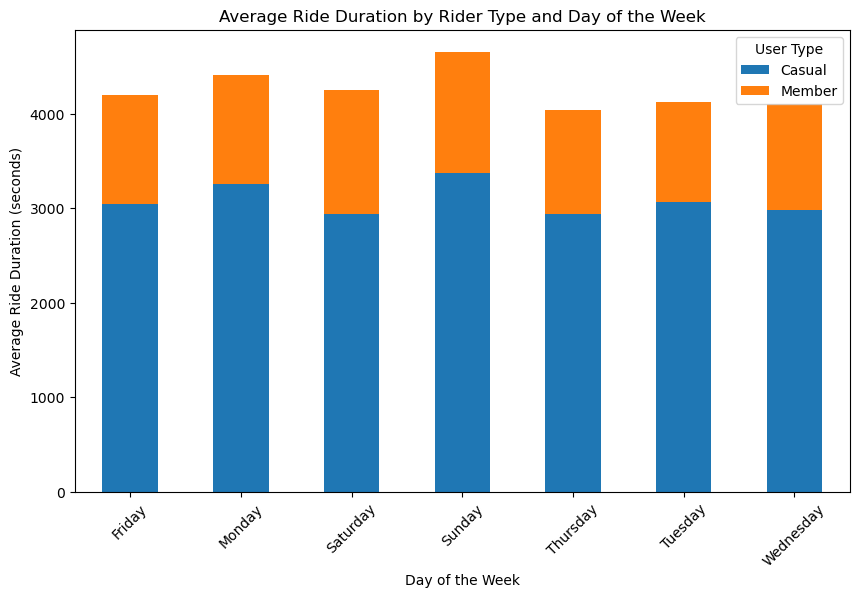

In [32]:
# Average ride duration by rider type
avg_duration_by_user = df_v2.groupby(["member_casual", "day_of_week"])["ride_length"].mean().reset_index()

# Pivot the data for visualization
pivot_avg_duration_by_user = avg_duration_by_user.pivot(index="day_of_week", columns="member_casual", values="ride_length")

# Plot the average ride duration by rider type
pivot_avg_duration_by_user.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Average Ride Duration by Rider Type and Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Average Ride Duration (seconds)")
plt.xticks(rotation=45)
plt.legend(title="User Type", loc="upper right", labels=["Casual", "Member"])
plt.show()


> ***From this analysis we can conclude that the casuals rides more than members. To increase the member subscription we can provide more offers for members, From that the casual can be subscribe. we can increase the annual Membership***